# Assessing the Impact of Daylight Savings Time on Driving Fatalities

- Anastasiades, Andrew
- Drozdzewicz, Peter
- Garcia, Viera
- Sperry, Taylor
- Surapanemi, Sindhura

### DEPENDENCIES

In [1]:
import pandas as pd #data manipulation
import os #Interoperability
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt

### FILE PATHS

In [2]:
accident_csv = os.path.join("Resources", "2018.csv")

### LOAD DATAFRAME

In [12]:
## We inspected the original CSV and chose the columns we believed were pertinent
columns_to_keep = ['STATENAME', 'DAY', 'MONTH','YEAR','HOUR','DAY_WEEK','DAY_WEEKNAME', 'LGT_CONDNAME',
                   'DRUNK_DR', 'WEATHERNAME', 'RUR_URBNAME', 'FATALS',]
df = pd.read_csv(accident_csv, usecols=columns_to_keep)

### CLEAN DATAFRAME

In [7]:
# EXCLUDE DRUNK DRIVERS #Why do we do this?
df = df[df["DRUNK_DR"]==0] 
df.drop(axis=1, labels=["DRUNK_DR"], inplace=True)

# ADD DATE AND WEEKNUM
# We do this so we can compare week to week changes
df["DATE"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])
#df["WEEK_NUM"] = df["DATE"].dt.week
df['WEEK_NUM'] = df['DATE'].apply(lambda x: (x + dt.timedelta(days=1)).week)

# SPLIT SAMPLE AND CONTROL
control_states = ["Arizona", "Hawaii"] #These states do not observe DLS
control_df = df[df.loc[:,'STATENAME'].isin(control_states)] #NO DLS
sample_df = df[~df.loc[:,'STATENAME'].isin(control_states)] #DLS

sample_df

### DISTRIBUTION OF WEEK-OVER-WEEK CHANGE IN FATALITIES

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


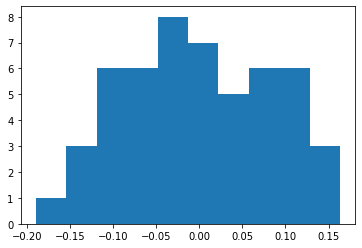

In [9]:
week_gb = sample_df.groupby(by=["WEEK_NUM"])
week_summary = pd.DataFrame(week_gb["FATALS"].sum())
#week_summary["WEEKLY_CHANGE"]
weekly_change = []
for index, row in week_summary.iterrows(): # WE WANT DELTA! FOR EACH WEEK
    if index==1:
        weekly_change.append(np.nan)
    else:
        this_num = week_summary.loc[index, "FATALS"] # FATALITIES FROM THIS WEEK
        last_num = week_summary.loc[index-1, "FATALS"] # FATALITIES FROM LAST WEEK
        delta = (this_num / last_num) - 1
        weekly_change.append(delta)
week_summary["WEEKLY_CHANGE"] = weekly_change
week_summary["Z_SCORE"] = st.zscore(weekly_change, nan_policy='omit')
week_summary.reset_index(inplace=True)
plt.hist(week_summary["WEEKLY_CHANGE"])
plt.show()

In [10]:
week_summary 

,WEEK_NUM,FATALS,WEEKLY_CHANGE,Z_SCORE
0,1,559,NaN,NaN
1,2,515,-0.078712,-0.886717
2,3,417,-0.190291,-2.160619
3,4,451,0.081535,0.942824
4,5,428,-0.050998,-0.570303
5,6,473,0.105140,1.212327
6,7,427,-0.097252,-1.098384
7,8,437,0.023419,0.279317
8,9,493,0.128146,1.474990
9,10,428,-0.131846,-1.493347


### Graphing with DAY_WEEKNAME

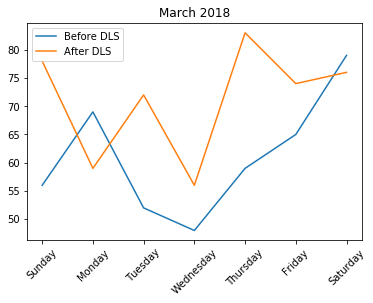

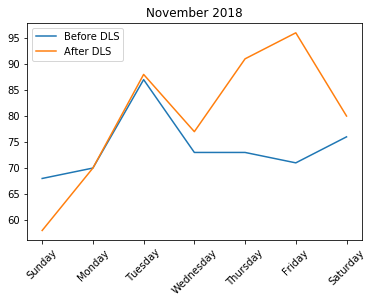

In [11]:
#MARCH 2018 - The switch occurs March 11
week_before = dt.date(2018,3,11).isocalendar()[1] #Determine week of year
week_after = week_before + 1

sample_gb = sample_df.groupby(by=["DATE","WEEK_NUM", "DAY_WEEKNAME"])
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
before = summary[summary["WEEK_NUM"]==week_before]
after = summary[summary["WEEK_NUM"]==week_after]
plt.plot(before["DAY_WEEKNAME"], before["FATALS"], label="Before DLS")
plt.plot(after["DAY_WEEKNAME"], after["FATALS"], label="After DLS")
plt.xticks(rotation = 45)
plt.legend()
plt.title("March 2018")
plt.show()

#NOVEMBER 2018 - The switch occurs November 4
week_before = dt.date(2019,11,4).isocalendar()[1] #Determine week of year (starting on Monday)
week_after = week_before + 1

sample_gb = sample_df.groupby(by=["DATE","WEEK_NUM", "DAY_WEEKNAME"])
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
before = summary[summary["WEEK_NUM"]==week_before]
after = summary[summary["WEEK_NUM"]==week_after]

plt.plot(before["DAY_WEEKNAME"], before["FATALS"], label="Before DLS")
plt.plot(after["DAY_WEEKNAME"], after["FATALS"], label="After DLS")
plt.xticks(rotation = 45)
plt.legend()
plt.title("November 2018")
plt.show()